# 5. Homologous human frameworks

The humanization of an antibody that was raised in another species is typically one of the major
steps in its development for clinical use in humans. Given the nature of VDJ recombination6
novel (non-germline) sequences can occur in the variable regions of the light and heavy chains
which makes the humanization of the variable regions more challenging. In many therapeutic
antibodies, any non-human antibody frameworks in the constant regions can be entirely and
directly substituted with their human homologs. In the variable regions however, especially in
the CDRs and in the sensitive regions around them that determine their conformations, only a
partial humanization may be possible, given the requirement to preserve the antibody’s affinity
for its antigen. For the humanization of antibody variable regions, alternative methods such as7
CDR grafting and resurfacing are often used, and these methods are also based upon the use
of sequences from close human homologs.

When the goal is reducing a clinical antibody’s immunogenicity in patients, humanization and
the removal of potential T-cell epitopes (deimmunization) are complementary approaches.
When the humanization of a particular segment of the variable region is impractical, it may be
possible to reduce the potential immunogenicity of that segment with fewer and/or more
conservative substitutions that reduce the number and/or strength of the potential T-cell
epitopes in that segment. For this reason, the data presented in this section and in the previous
immunogenicity analysis, can be used together in the antibody development process.

In this section, we present alignments of the light and heavy chains of the antibody with the ten
closest human homologs from a database of the human antibody germline. In each case, the
most homologous frameworks from either the heavy chain, or the light chain kappa and lambda
frameworks, are shown in conjunction with the best matching J regions. These alignments can
guide the selection of the most promising human frameworks that could be used for the
humanization of the variable regions, as well as highlighting non-human sequences that are
potential candidates for deimmunization in the event that their humanization is not practical.

## human framework alignments

In [1]:
import biotite.sequence as seq
import biotite.sequence.align as align
import numpy as np

alph = seq.ProteinSequence.alphabet
# Load the standard protein substitution matrix, which is BLOSUM62
matrix = align.SubstitutionMatrix.std_protein_matrix()
print("\nBLOSUM62\n")
print(matrix)
# Load another matrix from internal database
matrix = align.SubstitutionMatrix(alph, alph, "BLOSUM50")
# Load a matrix dictionary representation,
# modify it, and create the SubstitutionMatrix
# (The dictionary could be alternatively loaded from a string containing
# the matrix in NCBI format)
matrix_dict = align.SubstitutionMatrix.dict_from_db("BLOSUM62")
matrix_dict[("P","Y")] = 100
matrix = align.SubstitutionMatrix(alph, alph, matrix_dict)
# And now create a matrix by directly provding the ndarray
# containing the similarity scores
# (identity matrix in our case)
scores = np.identity(len(alph), dtype=int)
matrix = align.SubstitutionMatrix(alph, alph, scores)
print("\n\nIdentity matrix\n")
print(matrix)


BLOSUM62

    A   C   D   E   F   G   H   I   K   L   M   N   P   Q   R   S   T   V   W   Y   B   Z   X   *
A   4   0  -2  -1  -2   0  -2  -1  -1  -1  -1  -2  -1  -1  -1   1   0   0  -3  -2  -2  -1   0  -4
C   0   9  -3  -4  -2  -3  -3  -1  -3  -1  -1  -3  -3  -3  -3  -1  -1  -1  -2  -2  -3  -3  -2  -4
D  -2  -3   6   2  -3  -1  -1  -3  -1  -4  -3   1  -1   0  -2   0  -1  -3  -4  -3   4   1  -1  -4
E  -1  -4   2   5  -3  -2   0  -3   1  -3  -2   0  -1   2   0   0  -1  -2  -3  -2   1   4  -1  -4
F  -2  -2  -3  -3   6  -3  -1   0  -3   0   0  -3  -4  -3  -3  -2  -2  -1   1   3  -3  -3  -1  -4
G   0  -3  -1  -2  -3   6  -2  -4  -2  -4  -3   0  -2  -2  -2   0  -2  -3  -2  -3  -1  -2  -1  -4
H  -2  -3  -1   0  -1  -2   8  -3  -1  -3  -2   1  -2   0   0  -1  -2  -3  -2   2   0   0  -1  -4
I  -1  -1  -3  -3   0  -4  -3   4  -3   2   1  -3  -3  -3  -3  -2  -1   3  -3  -1  -3  -3  -1  -4
K  -1  -3  -1   1  -3  -2  -1  -3   5  -2  -1   0  -1   1   2   0  -1  -2  -3  -2   0   1  -1  -4
L  -1  -1

In [2]:
seq1 = seq.ProteinSequence("BIQTITE")
seq2 = seq.ProteinSequence("IQLITE")
matrix = align.SubstitutionMatrix.std_protein_matrix()
print("\nLocal alignment")
alignments = align.align_optimal(seq1, seq2, matrix, local=True)
for ali in alignments:
    print(ali)
print("Global alignment")
alignments = align.align_optimal(seq1, seq2, matrix, local=False)
for ali in alignments:
    print(ali)


Local alignment
IQTITE
IQLITE
Global alignment
BIQTITE
-IQLITE


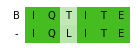

In [3]:
import matplotlib.pyplot as plt
import biotite.sequence.graphics as graphics

fig, ax = plt.subplots(figsize=(2.0, 0.8))
graphics.plot_alignment_similarity_based(
    ax, alignments[0], matrix=matrix, symbols_per_line=len(alignments[0])
)
fig.tight_layout()

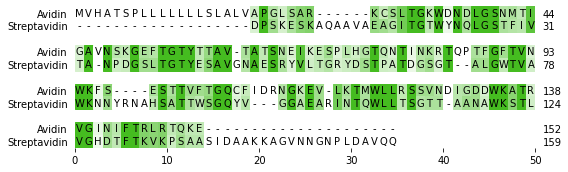

In [4]:
import matplotlib.pyplot as plt
import biotite.sequence as seq
import biotite.sequence.align as align
import biotite.sequence.io.fasta as fasta
import biotite.database.entrez as entrez
import biotite.sequence.graphics as graphics

# Download and parse protein sequences of avidin and streptavidin
fasta_file = fasta.FastaFile.read(entrez.fetch_single_file(
    ["CAC34569", "ACL82594"], None, "protein", "fasta"
))
for name, sequence in fasta_file.items():
    if "CAC34569" in name:
        avidin_seq = seq.ProteinSequence(sequence)
    elif "ACL82594" in name:
        streptavidin_seq = seq.ProteinSequence(sequence)

# Get BLOSUM62 matrix
matrix = align.SubstitutionMatrix.std_protein_matrix()
# Perform pairwise sequence alignment with affine gap penalty
# Terminal gaps are not penalized
alignments = align.align_optimal(avidin_seq, streptavidin_seq, matrix,
                                 gap_penalty=(-10, -1), terminal_penalty=False)

# Draw first and only alignment
# The color intensity indicates the similiarity
fig = plt.figure(figsize=(8.0, 2.5))
ax = fig.add_subplot(111)
graphics.plot_alignment_similarity_based(
    ax, alignments[0], matrix=matrix, labels=["Avidin", "Streptavidin"],
    show_numbers=True, show_line_position=True
)
fig.tight_layout()

plt.show()

In [6]:
# Code source: Patrick Kunzmann
# License: BSD 3 cl
from tempfile import gettempdir
import biotite.sequence as seq
import biotite.sequence.io.fasta as fasta
import biotite.sequence.graphics as graphics
import biotite.application.muscle as muscle
import biotite.application.blast as blast
import biotite.database.entrez as entrez
import matplotlib.pyplot as plt

# Download sequence of Streptococcus pyogenes Cas9
file_name = entrez.fetch("Q99ZW2", gettempdir(), "fa", "protein", "fasta")
fasta_file = fasta.FastaFile.read(file_name)
ref_seq = fasta.get_sequence(fasta_file)
# Find homologous proteins using NCBI Blast
# Search only the UniProt/SwissProt database
blast_app = blast.BlastWebApp("blastp", ref_seq, "swissprot", obey_rules=False)
blast_app.start()
blast_app.join()
alignments = blast_app.get_alignments()
# Get hit IDs for hits with score > 200
hits = []
for ali in alignments:
    if ali.score > 200:
        hits.append(ali.hit_id)
# Get the sequences from hit IDs
hit_seqs = []
for hit in hits:
    file_name = entrez.fetch(hit, gettempdir(), "fa", "protein", "fasta")
    fasta_file = fasta.FastaFile.read(file_name)
    hit_seqs.append(fasta.get_sequence(fasta_file))

# Perform a multiple sequence alignment using MUSCLE
app = muscle.MuscleApp(hit_seqs)
app.start()
app.join()
alignment = app.get_alignment()
# Print the MSA with hit IDs
print("MSA results:")
gapped_seqs = alignment.get_gapped_sequences()
for i in range(len(gapped_seqs)):
    print(hits[i], " "*3, gapped_seqs[i])

# Visualize the first 200 columns of the alignment
# Reorder alignments to reflect sequence distance

fig = plt.figure(figsize=(8.0, 8.0))
ax = fig.add_subplot(111)
order = app.get_alignment_order()
graphics.plot_alignment_type_based(
    ax, alignment[:200, order.tolist()], labels=[hits[i] for i in order],
    show_numbers=True, color_scheme="clustalx"
)
fig.tight_layout()

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'muscle': 'muscle'